In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import torch

# add path of Tangram repository for importing it
sys.path.append("./Tangram") 
import tangram as tg

## Mapping

AnnData object with n_obs × n_vars = 27261 × 17919
    obs: 'x', 'y'


/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 13829 × 17919
    obs: 'x', 'y'

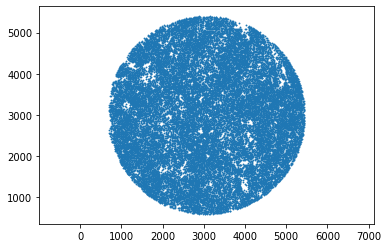

In [2]:
path = os.path.join('data', 'corrected_ad_sp.h5ad')
ad_sp = sc.read_h5ad(path)

print(ad_sp)

plt.axis('equal')
plt.scatter(ad_sp.obs.x.values, 
            ad_sp.obs.y.values, 
            s=.7)

ad_sp = ad_sp[ad_sp.obs.x <= (ad_sp.obs.x.max() - ad_sp.obs.x.min()) / 2 + ad_sp.obs.x.min()]
ad_sp

sc data might also be ought to only have test data because otherwise there are ones in sc data that is already mapped.

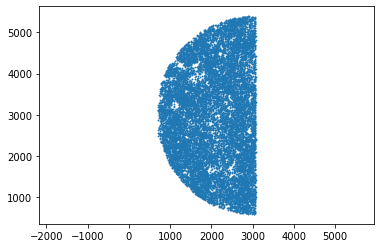

In [3]:
plt.axis('equal')
plt.scatter(ad_sp.obs.x.values, 
            ad_sp.obs.y.values, 
            s=.7)

In [6]:
# print("ad_sp.obs.x.max:", ad_sp.obs.x.max())
# print("ad_sp.obs.x.min:", ad_sp.obs.x.min())
# print("ad_sp.obs.y.max:", ad_sp.obs.y.max())
# print("ad_sp.obs.y.min:", ad_sp.obs.y.min())

ad_sp.obs.x.max: 5441.78409090909
ad_sp.obs.x.min: 704.224299065421
ad_sp.obs.y.max: 5397.65346534654
ad_sp.obs.y.min: 600.4921875


In [4]:
# single-cell data need the following steps:
# 1. remove mitochondrial genes, which are removed in this data set
# 2. normalization
# 3. log(1+p) transformation: not necessary for mapping; necessary for selecting marker genes

path = os.path.join('data', 'corrected_ad_sc.h5ad')
ad_sc = sc.read_h5ad(path)
sc.pp.normalize_total(ad_sc)
ad_sc

AnnData object with n_obs × n_vars = 26139 × 2505
    obs: 'cluster', 'subcluster'

In [5]:
# Tangram makes sure the gene orders are the same for both datasets
# genes=None uses all genes
# genes=markers uses marker genes defined in a list `markers`
ad_sc, ad_sp = tg.pp_adatas(ad_sc, ad_sp, genes=None)

In [16]:
ad_sc

View of AnnData object with n_obs × n_vars = 26139 × 2495
    obs: 'cluster', 'subcluster'

In [17]:
ad_sp

View of AnnData object with n_obs × n_vars = 13829 × 2495
    obs: 'x', 'y'

In [6]:
assert ad_sc.var.index.equals(ad_sp.var.index)

In [7]:
ad_map = tg.map_cells_to_space(
    adata_cells=ad_sc,
    adata_space=ad_sp,
#     device='cpu',
    device='cuda:0'
)

Score: 0.087, KL reg: nan, VG reg: nan
Score: 0.472, KL reg: nan, VG reg: nan
Score: 0.499, KL reg: nan, VG reg: nan
Score: 0.507, KL reg: nan, VG reg: nan
Score: 0.510, KL reg: nan, VG reg: nan
Score: 0.512, KL reg: nan, VG reg: nan
Score: 0.514, KL reg: nan, VG reg: nan
Score: 0.515, KL reg: nan, VG reg: nan
Score: 0.515, KL reg: nan, VG reg: nan
Score: 0.516, KL reg: nan, VG reg: nan


./Tangram/tangram/mapping_utils.py:129: RuntimeWarning: invalid value encountered in float_scalars
  cos_sims.append((v1 @ v2) / norm_sq)
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


In [8]:
# ad_map.write_h5ad('cerebellum_corrected_ad_map_portion5_all.h5ad')

## Analysis

In [9]:
# ad_map = sc.read_h5ad('cerebellum_corrected_ad_map_fraction4_nolog.h5ad')

path = os.path.join('data', 'corrected_ad_sc.h5ad')
ad_sc = sc.read_h5ad(path)
sc.pp.normalize_total(ad_sc)

path = os.path.join('data', 'corrected_ad_sp.h5ad')
ad_sp = sc.read_h5ad(path)
ad_sp = ad_sp[ad_sp.obs.x <= (ad_sp.obs.x.max() - ad_sp.obs.x.min()) / 2 + ad_sp.obs.x.min()]

/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


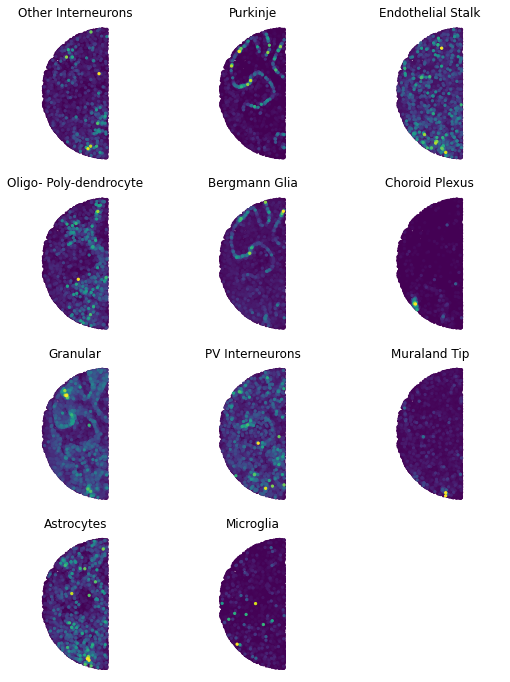

In [10]:
# check how to make the figure larger
tg.plot_cell_annotation(ad_map, annotation='cluster', nrows=4, ncols=3)

In [21]:
# ad_sc.X.sum(axis=1)

In [13]:
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=ad_sc)
ad_ge

AnnData object with n_obs × n_vars = 13829 × 2505
    obs: 'x', 'y'
    var: 'is_training'

In [18]:
ad_map.uns['train_genes_df'].head(10)

,train_score,sparsity_sc,sparsity_sp,sparsity_diff
RP23-403P24.5,0.996996,0.998011,0.999783,0.001772
4930515G01Rik,0.985641,0.999770,0.999928,0.000157
2900055J20Rik,0.982830,0.995562,0.999855,0.004293
Adamtsl1,0.976348,0.997896,0.999494,0.001598
Gm16099,0.973212,0.999579,0.999928,0.000349
Ttr,0.972503,0.962355,0.893846,-0.068509
Cdk15,0.969053,0.998967,0.999855,0.000888
1110019D14Rik,0.968488,0.995180,0.999205,0.004025
Sst,0.964832,0.999235,0.999060,-0.000175
Dqx1,0.964695,0.999082,0.999060,-0.000022


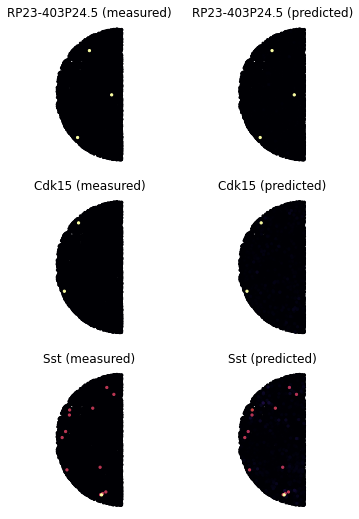

In [21]:
# high score genes
genes = ['RP23-403P24.5', 'Cdk15', 'Sst']
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge)

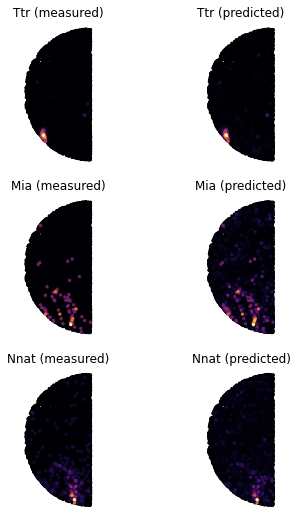

In [14]:
# high score genes
genes = ['Ttr', 'Mia', 'Nnat']
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge)

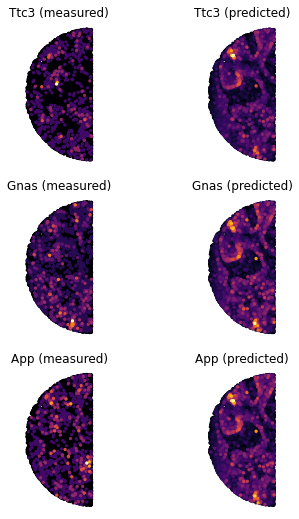

In [15]:
# low score genes
genes = ['Ttc3', 'Gnas', 'App']
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge)

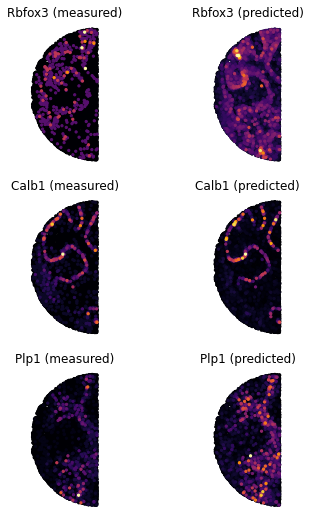

In [16]:
# marker genes of certain cell types
# Rbfox3 for gradule cells: Species and cell-type properties of classically defined human and rodent neurons and glia
# Calb1 for purkinje:
# Plp1 for oligo and astrocytes: Expression of Proteolipid Protein Gene in Spinal Cord Stem Cells and Early Oligodendrocyte Progenitor Cells Is Dispensable for Normal Cell Migration and Myelination
genes = ['Rbfox3', 'Calb1', 'Plp1']
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge)

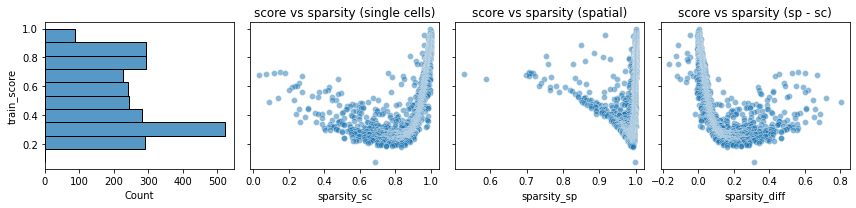

In [24]:
tg.plot_training_scores(ad_map, bins=50, alpha=.5)